In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad, dblquad,tplquad
from scipy.special import roots_legendre


# Problema 1. 

0
1
2
3
4
5


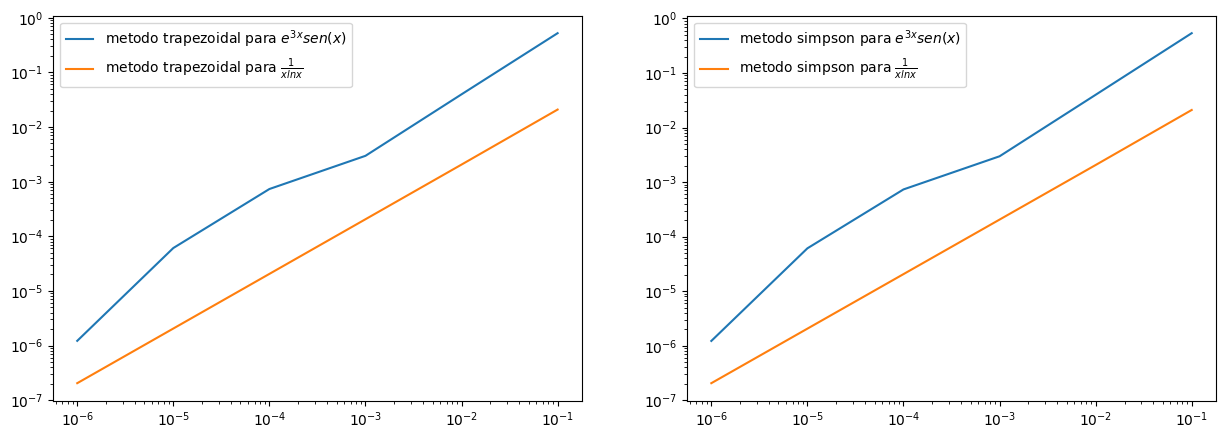

In [2]:
f1 = lambda x: np.exp(3*x)*np.sin(x)
f2 = lambda x: 1/(x*np.log(x))

a1, b1 = 0, np.pi/4
a2, b2 = np.e, 1 + np.e

h_values = []

conv_trapezoide_f1 = []
conv_trapezoide_f2 = []

conv_simpson_f1 = []
conv_simpson_f2 = []

h = 1e-1

for i in range(6):
    print(i)
    x1 = np.arange(a1, b1, h)
    x2 = np.arange(a2, b2, h)

    quad_f1 = quad(f1, a1, b1)[0]
    quad_f2 = quad(f2, a2, b2)[0]

    conv_trapezoide_f1.append(abs(trapezoid(f1(x1), x1) - quad_f1))
    conv_trapezoide_f2.append(abs(trapezoid(f2(x2), x2) - quad_f2))

    conv_simpson_f1.append(abs(simpson(f1(x1), x1) - quad_f1))
    conv_simpson_f2.append(abs(simpson(f2(x2), x2) - quad_f2))

    h_values.append(h)

    h /= 10

fig, ax = plt.subplots(1, 2, figsize= (15,5))

ax[0].loglog(h_values, conv_trapezoide_f1, label= 'metodo trapezoidal para $e^{3x}sen(x)$')
ax[0].loglog(h_values, conv_trapezoide_f2, label= 'metodo trapezoidal para $\\frac{1}{xlnx}$')

ax[0].legend()

ax[1].loglog(h_values, conv_simpson_f1, label= 'metodo simpson para $e^{3x}sen(x)$')
ax[1].loglog(h_values, conv_simpson_f2, label= 'metodo simpson para $\\frac{1}{xlnx}$')

ax[1].legend()


# Problrma 2.

In [3]:
f = lambda z, y, x:  np.sin(z/y)/y

a = 0

bx, by, bz = np.pi, lambda x: x, lambda x, y: x*y

# Metodo quad
def integral_z(x, y): # integral dz
    f_z = lambda z: f(z, y, x)
    return quad(f_z, a, bz(x, y))[0]

def integral_y(x): # integral dy
    f_y = lambda y: integral_z(x, y)
    return quad(f_y, a, by(x))[0]

integral_quad = quad(integral_y, a, bx)

# Metodo tplquad
integral_tplquad = tplquad(f, a, bx, a, by, a, bz)

print(f'Mediante el metodo quad se optubo: {integral_quad[0]} con un error de: {integral_quad[1]}')
print(f'Mediante el metodo triple quad se optubo: {integral_tplquad[0]} con un error de: {integral_tplquad[1]}')

Mediante el metodo quad se optubo: 6.934802200544679 con un error de: 7.699177074265904e-14
Mediante el metodo triple quad se optubo: 6.934802200544679 con un error de: 7.699177074265904e-14


# Problema 3.

In [4]:
def gauss_quad_standard(func, n, a, b):
    """
    Calcula la integral de una función en el intervalo [a, b]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).
    - a: limite inferior
    - b: limite superior

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = ((b-a)/2) * np.sum(w * func(((b-a) *x + (a+b))/2))
    return integral

# Integral con gauss_quad
def integral_gauss_z(x, y): #   
    f_z = lambda z: f(z, y, x)
    return gauss_quad_standard(f_z, 2, a, bz(x, y))

def integral_gauss_y(x):
    f_y = lambda y: integral_gauss_z(x, y)
    return gauss_quad_standard(f_y, 2, a, by(x))

integral_gauss = gauss_quad_standard(integral_gauss_y, 2, a, bx)

print(f'La integral mediante el metodo de gauss_quad estandar fue: {integral_gauss}')

La integral mediante el metodo de gauss_quad estandar fue: 8.957576952517643


# Problema 4

In [96]:
f1 = lambda x: 1/np.sqrt(np.tan(x))

x = np.linspace(0, np.pi/2, 1000001)[1:-1]

integral_trap = trapezoid(f1(x), x)
integral_simp = simpson(f1(x), x)
integral_cuad = quad(f1, 1e-5, np.pi/2 - 1e-5)[0]

print(f'La integral con el metodo trapezoidal fue: {integral_trap}\n',
      f'La integral con el metodo simpson fue: {integral_simp}\n'
      f'La integral con el metodo de cuadratura fue: {integral_cuad}')

La integral con el metodo trapezoidal fue: 2.218984527665526
 La integral con el metodo simpson fue: 2.2189407040932765
La integral con el metodo de cuadratura fue: 2.2151168926767864


In [ ]:
f2 = lambda x: np.cos(x)/x**2

x = np.linspace(1, 1000000, 10000000)

integral2_trap = trapezoid(f2(x), x)
integral2_simp = simpson(f2(x), x)
integral2_cuad = quad(f2, 1, np.inf)[0]

print(f'La integral con el metodo trapezoidal fue: {integral2_trap}\n',
      f'La integral con el metodo simpson fue: {integral2_simp}\n'
      f'La integral con el metodo de cuadratura fue: {integral2_cuad}')

La integral con el metodo trapezoidal fue: -0.08281253784662401
 La integral con el metodo simpson fue: -0.0843980508186508
La integral con el metodo de cuadratura fue: -0.08427717828043757


C:\Users\luisd\AppData\Local\Temp\ipykernel_16940\4000954444.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral2_cuad = quad(f2, 1, np.inf)[0]


In [126]:
f3 = lambda y, x: 1/np.sqrt(1-y**2)

n = 1e7
a1, b1 = 0, lambda y: np.sin(y)
a2, b2 = 0, np.pi/2

integral3_cuadratura = dblquad(f3, a2, b2, a1, b1)

print(f'La integral con el metodo trapezoidal fue: {integral3_cuadratura}\n')


La integral con el metodo trapezoidal fue: (1.2337005501361709, 9.722304833015719e-09)

